# Introduction
My name is Branden from Data Science Hacktiv8 Batch 05 

# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading

In [2]:
df = pd.read_csv("./train.csv")
train_df = pd.read_csv("./train.csv")
print(df.shape)
df.head(5)

(3499, 26)


,game_id,names,min_players,max_players,avg_time,min_time,max_time,year,geek_rating,num_votes,...,category4,category5,category6,category7,category8,category9,category10,category11,category12,designer
0,17526,Hecatomb,2,4,30,30,30,2005,5.70135,360,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Mike Elliott, Jonathan Tweet"
1,156,Wildlife Adventure,2,6,60,60,60,1985,5.92648,535,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Wolfgang Kramer, Ursula Kramer"
2,2397,Backgammon,2,2,30,30,30,-3000,6.37107,9684,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,(Uncredited)
3,8147,Maka Bana,2,6,60,45,60,2003,5.90326,658,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,François Haffner
4,92190,Super Dungeon Explore,2,6,120,120,120,2011,6.37715,2338,...,Fighting,Miniatures,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Chris Birkenhagen, John Cadice, Deke Stella"


# EDA

Since there are too many feature let's check which one we can remove

In [3]:
categorical_col = df.select_dtypes(["object"]).columns.tolist()
numerical_col = [i for i in df if i not in categorical_col]
print("Categorical Column: ", categorical_col)
print("Numerical Column: ", numerical_col)
print("Data rows: %s" %df.shape[0])

Categorical Column:  ['names', 'mechanic', 'category1', 'category2', 'category3', 'category4', 'category5', 'category6', 'category7', 'category8', 'category9', 'category10', 'category11', 'category12', 'designer']
Numerical Column:  ['game_id', 'min_players', 'max_players', 'avg_time', 'min_time', 'max_time', 'year', 'geek_rating', 'num_votes', 'age', 'owned']
Data rows: 3499


In [4]:
print("Categorical column")
for i in categorical_col:
    print(f"{i}: {df[i].nunique()} {str(df[i].dtype)}")

Categorical column
names: 3485 object
mechanic: 1758 object
category1: 78 object
category2: 81 object
category3: 72 object
category4: 62 object
category5: 45 object
category6: 38 object
category7: 21 object
category8: 14 object
category9: 5 object
category10: 3 object
category11: 1 object
category12: 1 object
designer: 1905 object


names column is just something like identity, we can safely remove that. and for designer, seems like there are some people who made more than one board games, but saving this will just complicate things so we also remove that.

In [5]:
print("Numerical column")
for i in numerical_col:
    print(f"{i}: {df[i].nunique()} {str(df[i].dtype)}")

Numerical column
game_id: 3499 int64
min_players: 8 int64
max_players: 27 int64
avg_time: 62 int64
min_time: 54 int64
max_time: 62 int64
year: 92 int64
geek_rating: 3430 float64
num_votes: 1891 int64
age: 19 int64
owned: 2328 int64


game_id is just an identity we can safely remove that

In [6]:
df = df.drop(columns=["game_id", "names", "designer"])
categorical_col = df.select_dtypes(["object"]).columns.tolist()
numerical_col = [i for i in df if i not in categorical_col]

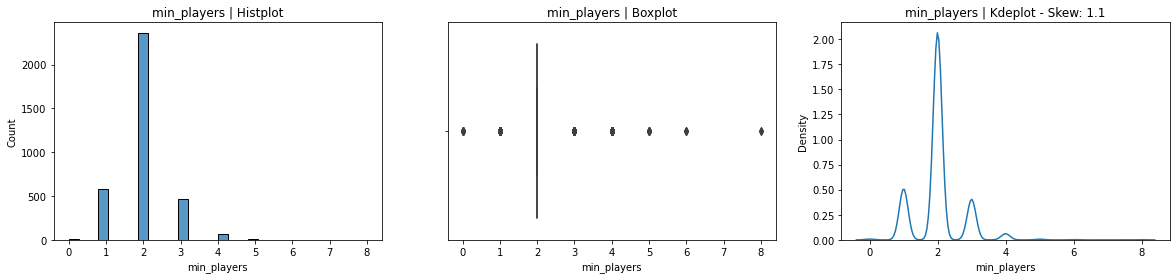

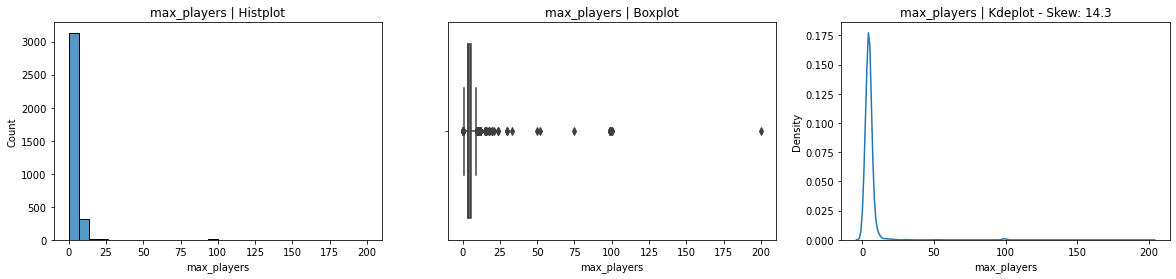

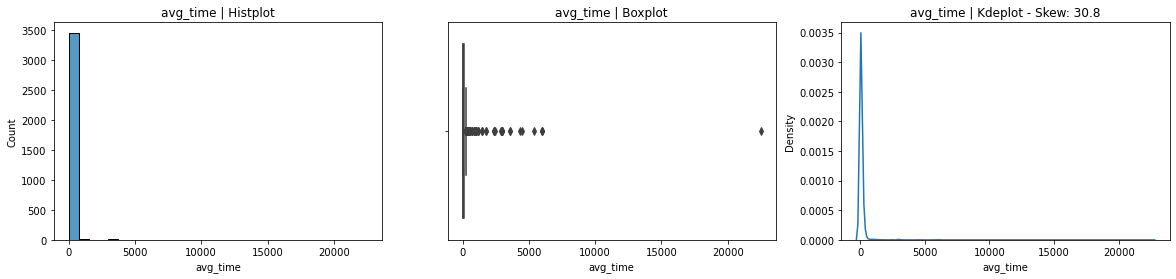

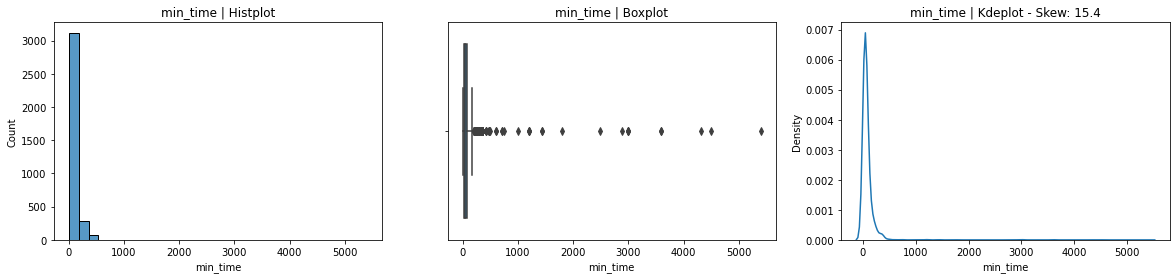

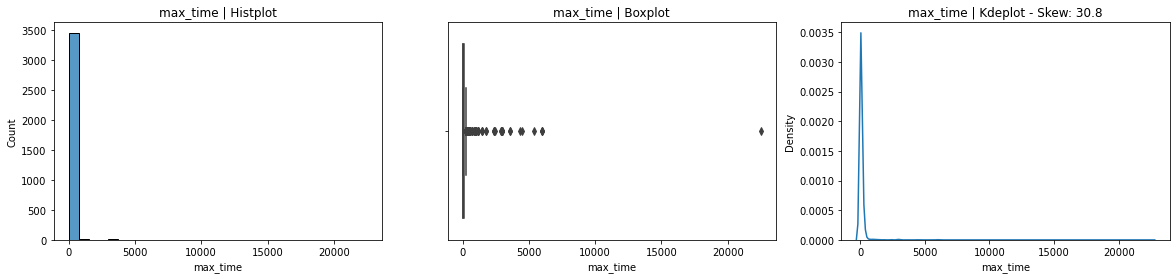

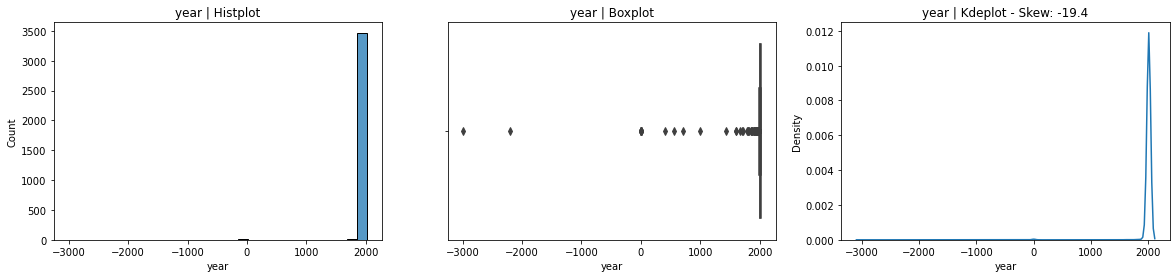

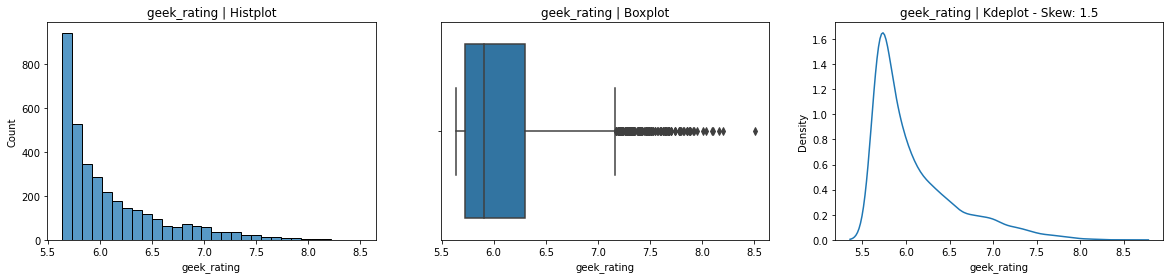

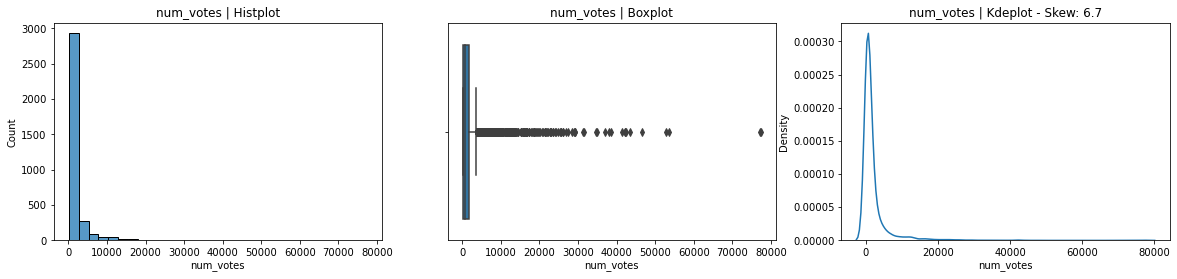

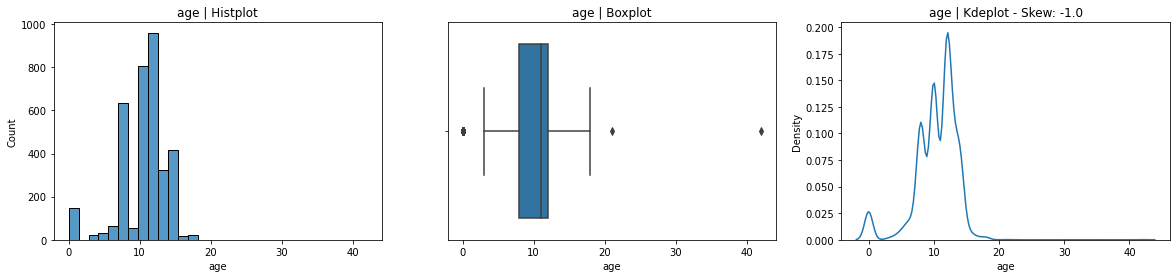

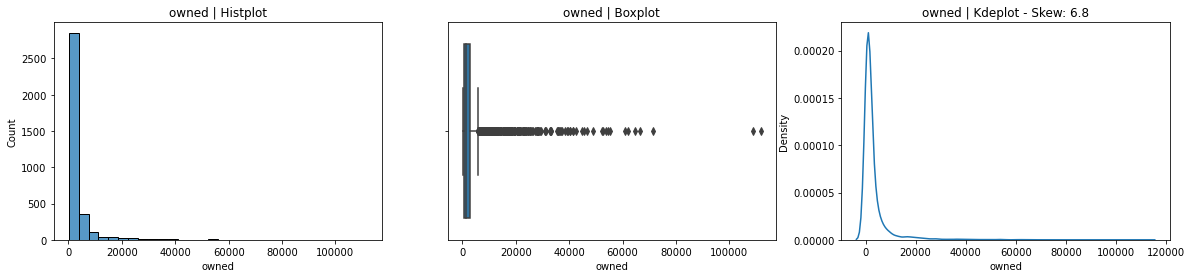

In [7]:
for i in df[numerical_col].columns:
    fig, ax = plt.subplots(1, 3, figsize=(20,4))
    sns.histplot(x=df[i],ax=ax[0], bins=30)
    sns.boxplot(x=df[i], ax=ax[1])
    sns.kdeplot(df[i], ax=ax[2])
    skew_val=round(df[i].skew(), 1)
    ax[0].set_title(i + " | Histplot")
    ax[1].set_title(i + " | Boxplot")
    ax[2].set_title(i + " | Kdeplot - Skew: "+str(skew_val))
    plt.show()

This dataset is pretty skewed and there are some error input

In [8]:
def rm_error_input(df, cols):
    for col in cols:
        df[col] = np.where(df[col] < 1, round(df[col].median()), df[col])
    return df

In [9]:
df = rm_error_input(df, df[numerical_col].columns)
df.describe()

,min_players,max_players,avg_time,min_time,max_time,year,geek_rating,num_votes,age,owned
count,3499.000000,3499.000000,3499.000000,3499.000000,3499.000000,3499.000000,3499.000000,3499.000000,3499.000000,3499.000000
mean,2.019720,5.079165,117.442412,83.202629,117.553873,2004.481566,6.087625,2006.029723,10.891969,3054.956273
std,0.658246,7.229653,487.739546,214.003267,487.710019,50.976282,0.482988,4644.623169,2.368627,6369.305496
min,1.000000,1.000000,2.000000,1.000000,2.000000,400.000000,5.640240,62.000000,3.000000,49.000000
25%,2.000000,4.000000,30.000000,30.000000,30.000000,2004.000000,5.726210,281.000000,10.000000,622.500000
50%,2.000000,4.000000,60.000000,45.000000,60.000000,2011.000000,5.904700,618.000000,11.000000,1204.000000
75%,2.000000,6.000000,120.000000,90.000000,120.000000,2015.000000,6.302635,1640.000000,12.000000,2723.000000
max,8.000000,200.000000,22500.000000,5400.000000,22500.000000,2018.000000,8.501630,77423.000000,42.000000,111807.000000


now some error is removed

IQR Method

In [10]:
def find_skewed_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [11]:
right_skew = df[numerical_col].drop(columns=["age", "year", "geek_rating"]).columns 
df_skewed = df.copy()
for col in right_skew:
    df_skewed[col] = np.log10(1+df_skewed[col])

geek_rating is dropped, because it's out target

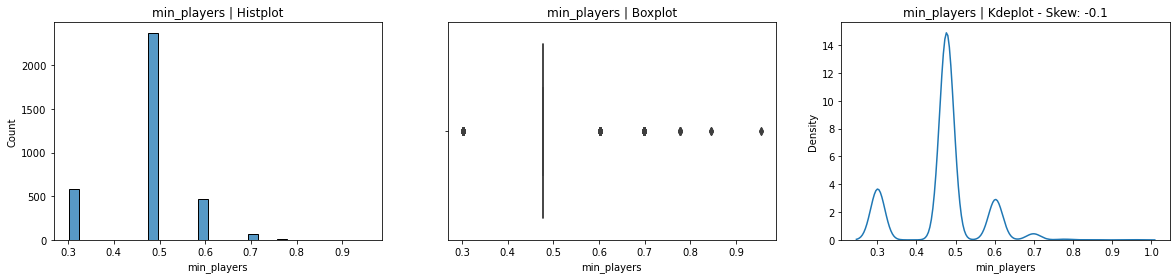

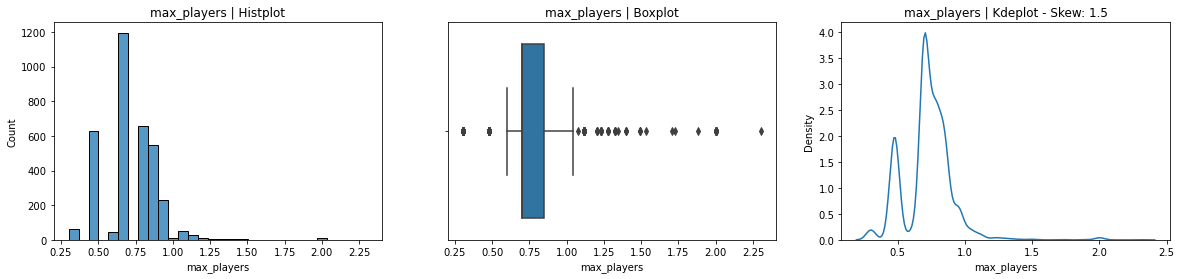

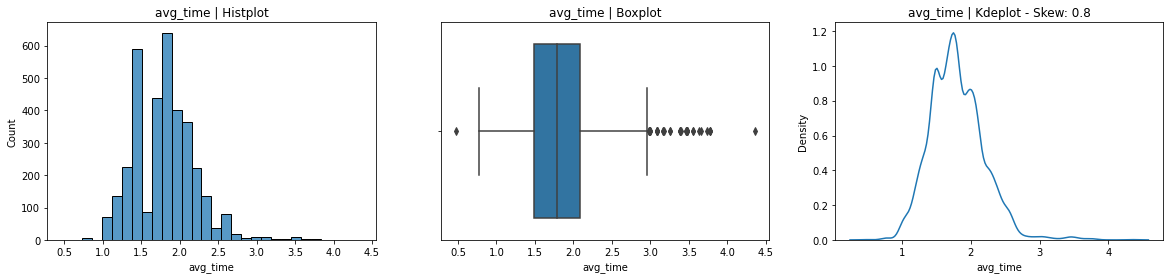

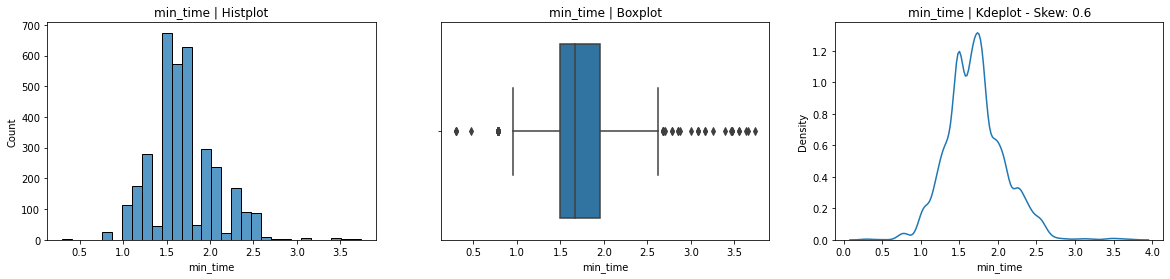

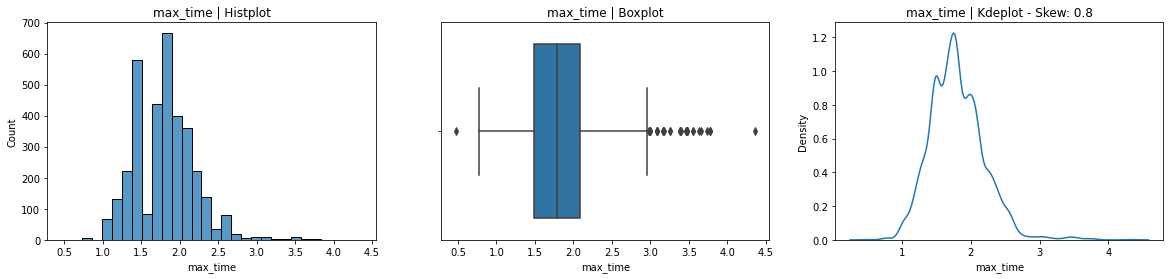

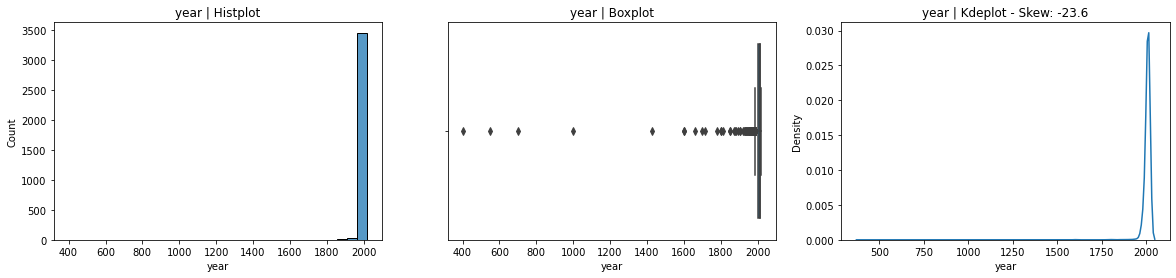

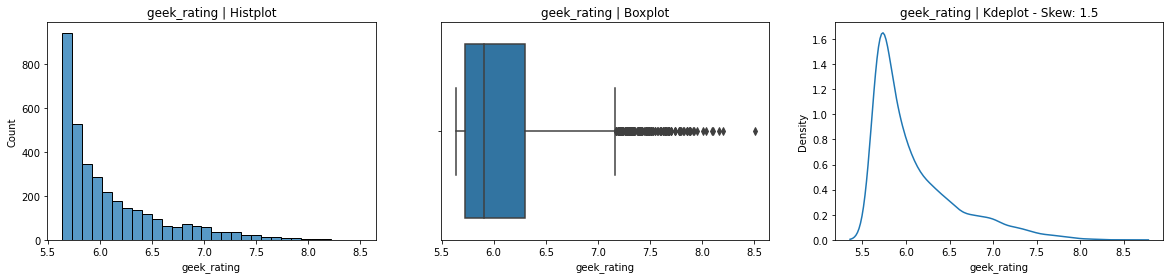

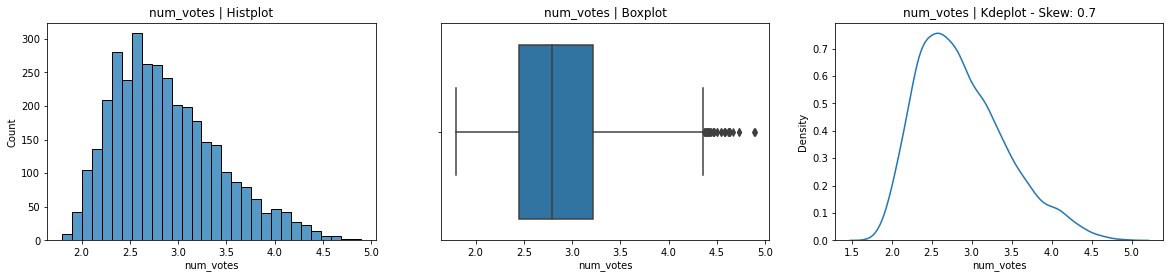

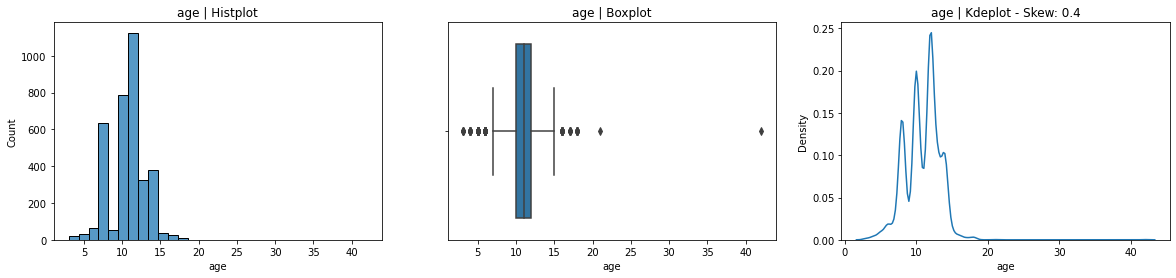

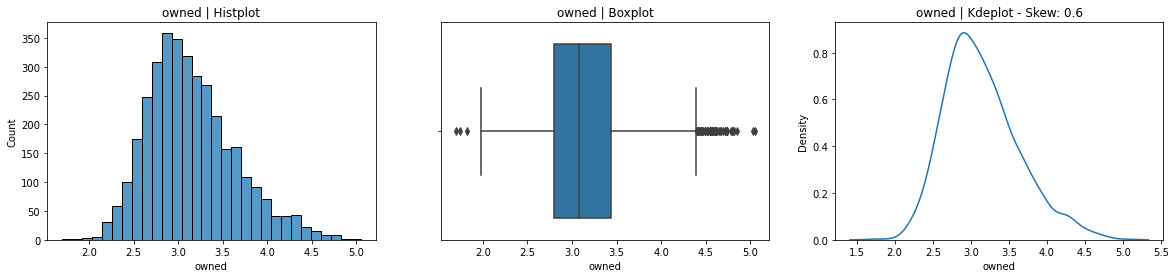

In [12]:
for i in df[numerical_col].columns:
    fig, ax = plt.subplots(1, 3, figsize=(20,4))
    sns.histplot(x=df_skewed[i],ax=ax[0], bins=30)
    sns.boxplot(x=df_skewed[i], ax=ax[1])
    sns.kdeplot(df_skewed[i], ax=ax[2])
    skew_val=round(df_skewed[i].skew(), 1)
    ax[0].set_title(i + " | Histplot")
    ax[1].set_title(i + " | Boxplot")
    ax[2].set_title(i + " | Kdeplot - Skew: "+str(skew_val))
    plt.show()

The skewness is a bit better now

Let's check the correlation with our target

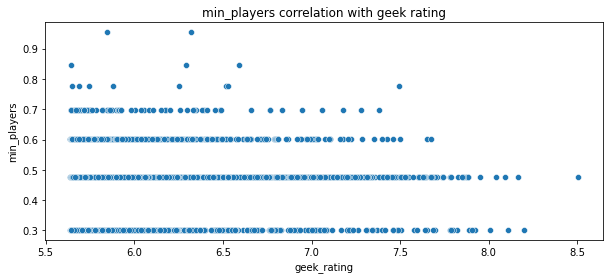

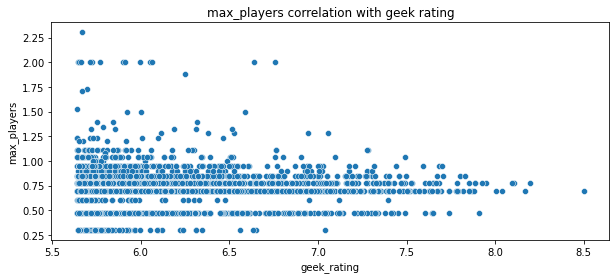

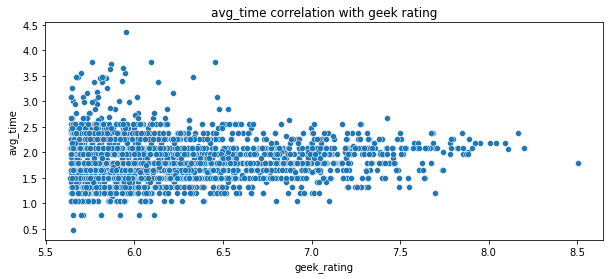

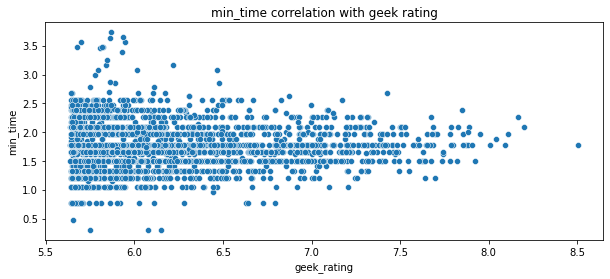

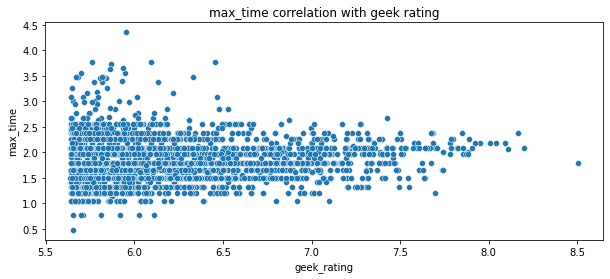

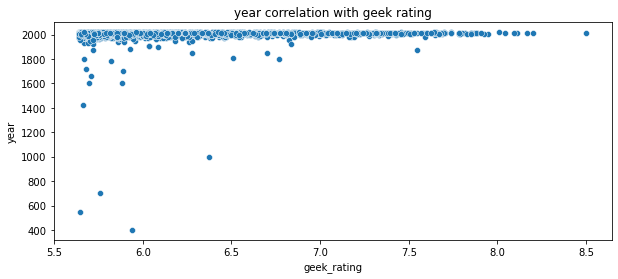

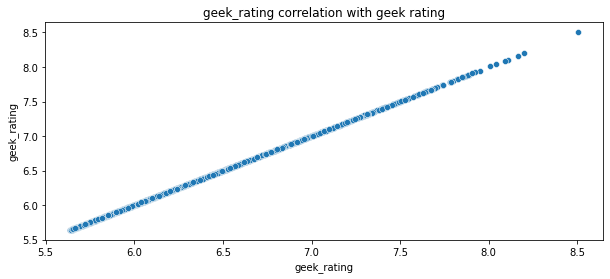

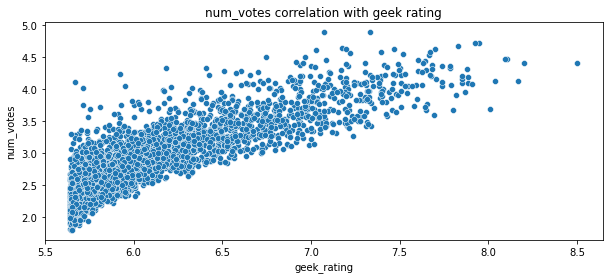

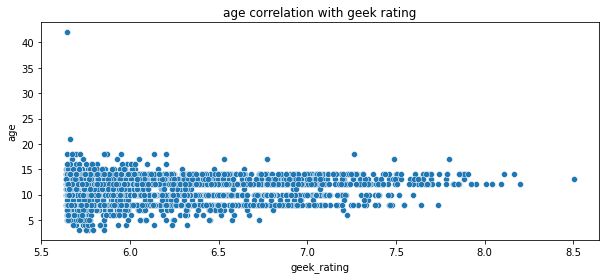

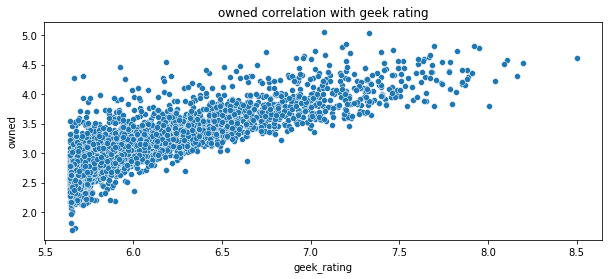

In [13]:
for col in df[numerical_col].columns:
    fig, ax = plt.subplots(1, 1, figsize=(10,4))
    sns.scatterplot(data=df_skewed, x="geek_rating", y=col)
    ax.set_title(col + " correlation with geek rating")
    plt.show()

it seems only owned and num_votes which is correlate with the geek_rating the most, and the outliers is really bothering our data.

In [14]:
df.describe()

,min_players,max_players,avg_time,min_time,max_time,year,geek_rating,num_votes,age,owned
count,3499.000000,3499.000000,3499.000000,3499.000000,3499.000000,3499.000000,3499.000000,3499.000000,3499.000000,3499.000000
mean,2.019720,5.079165,117.442412,83.202629,117.553873,2004.481566,6.087625,2006.029723,10.891969,3054.956273
std,0.658246,7.229653,487.739546,214.003267,487.710019,50.976282,0.482988,4644.623169,2.368627,6369.305496
min,1.000000,1.000000,2.000000,1.000000,2.000000,400.000000,5.640240,62.000000,3.000000,49.000000
25%,2.000000,4.000000,30.000000,30.000000,30.000000,2004.000000,5.726210,281.000000,10.000000,622.500000
50%,2.000000,4.000000,60.000000,45.000000,60.000000,2011.000000,5.904700,618.000000,11.000000,1204.000000
75%,2.000000,6.000000,120.000000,90.000000,120.000000,2015.000000,6.302635,1640.000000,12.000000,2723.000000
max,8.000000,200.000000,22500.000000,5400.000000,22500.000000,2018.000000,8.501630,77423.000000,42.000000,111807.000000


Let's remove the outliers

In [15]:
check_total = []
def outliers(x, cols):
    for col in df[cols].columns:
        upper_boundary, lower_boundary = find_skewed_boundaries(x, col, 3)
        check_total.append([col, len(x[x[col] < lower_boundary]), len(x[x[col] > upper_boundary])])
        x[col] = np.where(x[col] < lower_boundary, lower_boundary, x[col])
        x[col] = np.where(x[col] > upper_boundary, upper_boundary, x[col])
    return x

    
df_outliers = outliers(df, [i for i in numerical_col if i not in ["min_players","geek_rating", "age"]])
df_outliers.describe()

,min_players,max_players,avg_time,min_time,max_time,year,geek_rating,num_votes,age,owned
count,3499.000000,3499.000000,3499.000000,3499.000000,3499.000000,3499.000000,3499.000000,3499.000000,3499.000000,3499.000000
mean,2.019720,4.594456,86.839383,68.749929,86.950843,2007.138039,6.087625,1357.218634,10.891969,2246.609889
std,0.658246,2.059821,83.573764,62.786087,83.442173,10.474237,0.482988,1649.450424,2.368627,2486.459809
min,1.000000,1.000000,2.000000,1.000000,2.000000,1971.000000,5.640240,62.000000,3.000000,49.000000
25%,2.000000,4.000000,30.000000,30.000000,30.000000,2004.000000,5.726210,281.000000,10.000000,622.500000
50%,2.000000,4.000000,60.000000,45.000000,60.000000,2011.000000,5.904700,618.000000,11.000000,1204.000000
75%,2.000000,6.000000,120.000000,90.000000,120.000000,2015.000000,6.302635,1640.000000,12.000000,2723.000000
max,8.000000,12.000000,390.000000,270.000000,390.000000,2018.000000,8.501630,5717.000000,42.000000,9024.500000


the outliers is better now

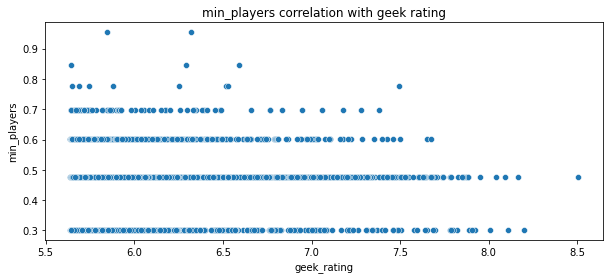

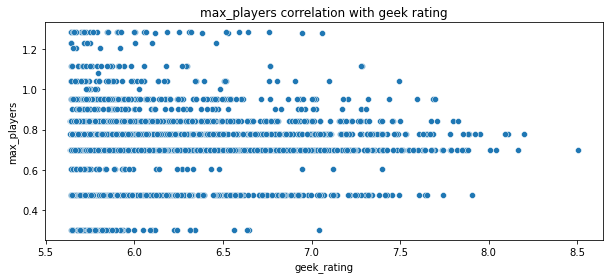

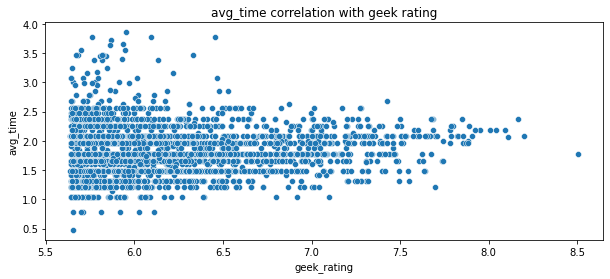

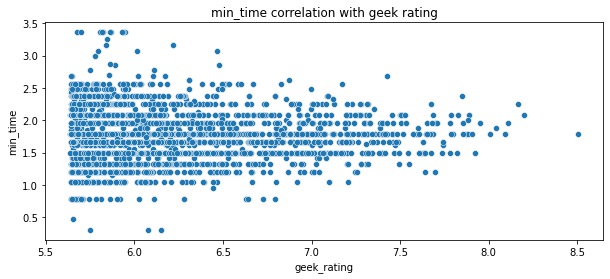

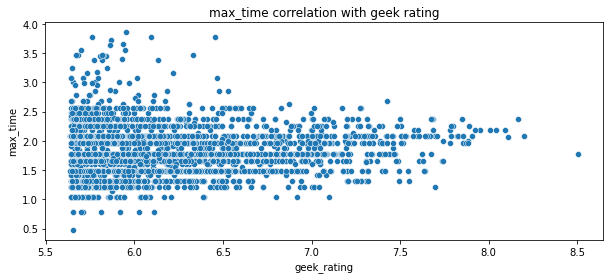

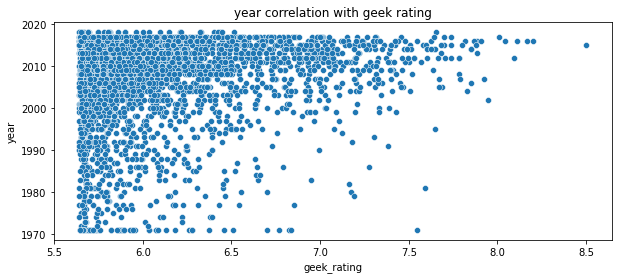

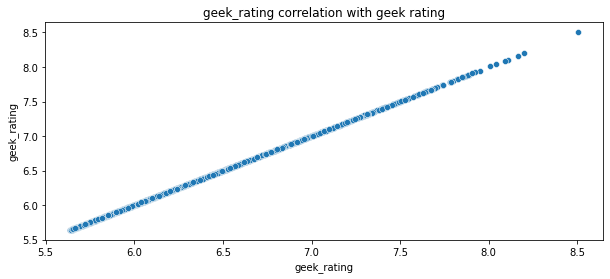

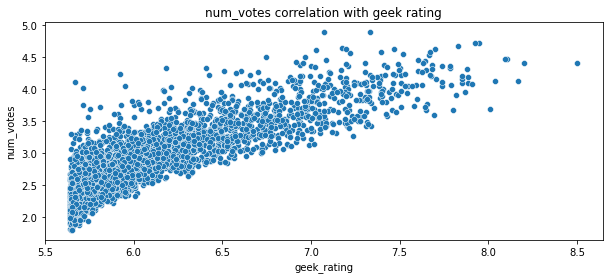

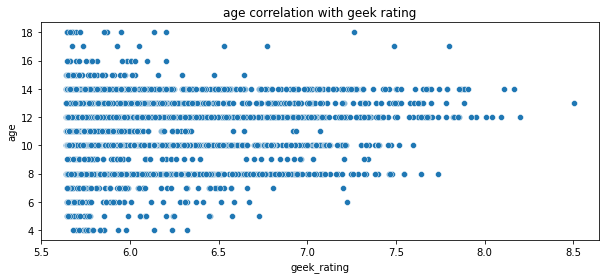

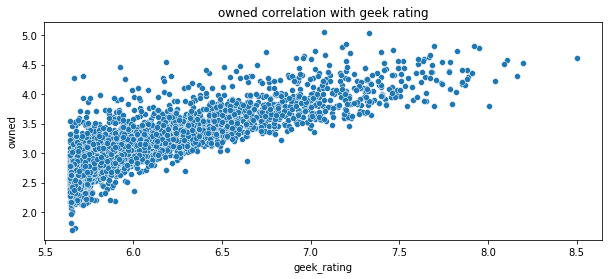

In [16]:
df_skewed2 = outliers(df_skewed, [i for i in numerical_col if i not in ["min_players","geek_rating"]])
for col in df_skewed2[numerical_col].columns:
    fig, ax = plt.subplots(1, 1, figsize=(10,4))
    sns.scatterplot(data=df_skewed2, x="geek_rating", y=col)
    ax.set_title(col + " correlation with geek rating")
    plt.show()

# Data Cleaning

In [17]:
df.isnull().sum()

min_players       0
max_players       0
avg_time          0
min_time          0
max_time          0
year              0
geek_rating       0
num_votes         0
age               0
mechanic          0
owned             0
category1         0
category2       611
category3      1773
category4      2636
category5      3098
category6      3363
category7      3453
category8      3480
category9      3494
category10     3495
category11     3498
category12     3498
dtype: int64

Those null one in category means it's empty, so we can just replace it with None

# Preprocessing

Feature Selection

In [18]:
corr = df_skewed2.copy()
corr = corr.corr()["geek_rating"]
print(corr)

min_players   -0.041434
max_players    0.037296
avg_time       0.101154
min_time       0.065714
max_time       0.099269
year           0.108002
geek_rating    1.000000
num_votes      0.848674
age            0.130482
owned          0.832518
Name: geek_rating, dtype: float64


according to our EDA and correlation, we will pick avg_time, min_players, max_players, year, num_votes, and owned

In [19]:
from sklearn.base import TransformerMixin

class SkewTransform(TransformerMixin): 
  def fit(self, X, y=None, **fit_params): 
    return self 
  def transform(self, df, y=None, ): 
    return np.log10(1+df)

Imputing and then fix mechanic and category column and then Scaling

In [20]:
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.preprocessing import MultiLabelBinarizer
class mechanicTransform(BaseEstimator,TransformerMixin): 
    def __init__(self,):
        self.mlb = MultiLabelBinarizer()

    def fit_transform(self, df, y=None, **fit_params):
        return pd.DataFrame(self.mlb.fit_transform(df['mechanic'].str.split(', ')),columns=self.mlb.classes_, index=df.index)

    def fit(self, df, y=None, **fit_params): 
        self.mlb.fit(df['mechanic'].str.split(', '))
        return self

    def transform(self, df, y=None, **fit_params): 
        return pd.DataFrame(self.mlb.transform(df['mechanic'].str.split(', ')),columns=self.mlb.classes_, index=df.index)

In [21]:
class categoryTransform(BaseEstimator,TransformerMixin): 
    def __init__(self,):
        self.mlb = MultiLabelBinarizer()

    def func1(self, df):
        df = pd.DataFrame(df, columns=(f"category{i+1}" for i in range(12)))
        for i in range(12):
            df[f"category{i+1}"] = df[f"category{i+1}"].str.lstrip()
        df_category = df[(f"category{i+1}" for i in range(12))].apply(lambda x: ",".join(x), axis=1).str.split(',')
        return df_category

    def fit_transform(self, df, y=None, **fit_params):
        df_category = self.func1(df)
        return self.mlb.fit_transform(df_category)

    def fit(self, df, y=None, **fit_params): 
        df_category = self.func1(df)
        self.mlb.fit(df_category)
        return self
    
    def transform(self, df, y=None, **fit_params): 
        df_category = self.func1(df)
        return self.mlb.transform(df_category)

In [22]:
X_train = train_df.drop(columns=["game_id", "names", "designer", "geek_rating", "min_time", "max_time", "age"]) #"min_players", "max_players", "avg_time", "min_time", "max_time", "year", "age"
y = train_df["geek_rating"]
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X_train2, train_df["geek_rating"], test_size=0.3, random_state=42)

In [23]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.decomposition import KernelPCA, PCA
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler

df2 = X_train.copy()
cat_col = df2.select_dtypes(["object"]).columns.to_list()
num_col2 = [i for i in df2 if i not in cat_col]
num_col = [i for i in df2 if i not in cat_col]
num_col.remove("year")

step_imputer = Pipeline(
  steps=[
    ("imputer", SimpleImputer(missing_values=np.nan, strategy='constant', fill_value="None")),
    ("categoryTransform", categoryTransform()),
    ]
)

step_scaler = Pipeline(
  steps=[
    ("skew_transform", SkewTransform()),
    ("standard_scaler", StandardScaler()),
    ]
)

step_catTransform = ColumnTransformer(
  transformers=[
    ("mechanicTransform", mechanicTransform(), [0]),
    ("step_imputer", step_imputer, [i+1 for i in range(12)]),
    ],remainder='drop')

step_pca = Pipeline(
  steps=[
    ("step_cat_transform", step_catTransform),
    ("pca", PCA(n_components=0.95)),
    # ("scaler2", MinMaxScaler())
  ]
)

preprocess = ColumnTransformer(
  transformers=[
    ("mechanicTransform", step_pca, cat_col),
    ("step_scaler", step_scaler, num_col)
    ],remainder='drop')


ctest = preprocess.fit_transform(df2)

Clean the input train

In [24]:
X_train = rm_error_input(X_train, num_col2) 
X_train = outliers(X_train, num_col2) # no need to do this on testing

Model Training and Evaluation

In [25]:
def rmse(x):
    return -x

In [26]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

param_grid = {}
pipe = make_pipeline(preprocess, SVR(kernel="rbf") ) # PolynomialFeatures(2), 
folds = KFold(n_splits = 5, shuffle = True, random_state = 42)
gridcv = GridSearchCV(pipe, param_grid=param_grid,cv=folds, scoring="neg_root_mean_squared_error", return_train_score=True, n_jobs=-1)
gridcv.fit(X_train, y)
print("Best cross-validation score: {:.5}".format(rmse(gridcv.best_score_)))
# print("cross-validation test predict score: {:.5}".format(rmse(gridcv.score(X_test, y_test))))

Best cross-validation score: 0.20075


<AxesSubplot:xlabel='actual', ylabel='pred'>

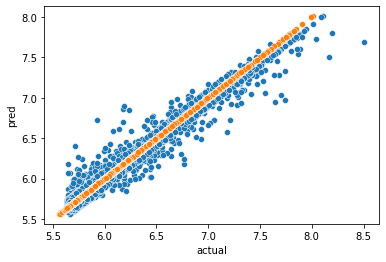

In [27]:
df_check = X_train.copy()
df_check["actual"] = y
df_check["pred"] = gridcv.predict(X_train)
sns.scatterplot(data = df_check, x = "actual", y="pred",)
sns.scatterplot(data = df_check, x = "pred", y="pred",)

# Model Improvement

Let's check which one is better

In [39]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
param_grid = [
    {
        "regression": [SVR()],
        "regression__kernel": ["linear", "sigmoid"],
    },
    {
        "regression": [LGBMRegressor()],
    },
    {
        "regression": [CatBoostRegressor(silent= True,)],
    },
    {
        "regression": [RandomForestRegressor()],
    },
    {
        "regression": [XGBRegressor()],
    },
    {
        "regression": [AdaBoostRegressor()],
    }
]

In [40]:
pipe = Pipeline([("preprocess", preprocess), ("regression", SVR())])
folds = KFold(n_splits = 5, shuffle = True, random_state = 42)
gridcv = GridSearchCV(pipe, param_grid=param_grid,cv=folds, scoring="neg_root_mean_squared_error", verbose= False, n_jobs=-1)
gridcv.fit(X_train, y)
print("Best params:\n{}\n".format(gridcv.best_params_))
print("Best cross-validation score: {:.5}".format(rmse(gridcv.best_score_)))
# print("cross-validation test predict score: {:.5}".format(rmse(gridcv.score(X_test, y_test))))

Best params:
{'regression': <catboost.core.CatBoostRegressor object at 0x000001613F86FF70>}

Best cross-validation score: 0.19458


The winner is Catboost!

In [30]:
param_grid = {
        "regression" : [CatBoostRegressor(silent= True,)],
        "regression__learning_rate": [0.046878],
        "regression__iterations": [1100, 1200, 1300],
    }


In [31]:
pipe = Pipeline([("preprocess", preprocess), ("regression", CatBoostRegressor())])
folds = KFold(n_splits = 5, shuffle = True, random_state = 42)
gridcv = GridSearchCV(pipe, param_grid=param_grid,cv=folds, scoring="neg_root_mean_squared_error", n_jobs=2)
gridcv.fit(X_train, y)
print("Best params:\n{}\n".format(gridcv.best_params_))
print("Best cross-validation score: {:.5}".format(rmse(gridcv.best_score_)))

Best params:
{'regression': <catboost.core.CatBoostRegressor object at 0x000001613F7D6B80>, 'regression__iterations': 1200, 'regression__learning_rate': 0.046878}

Best cross-validation score: 0.1946


<AxesSubplot:xlabel='actual', ylabel='pred'>

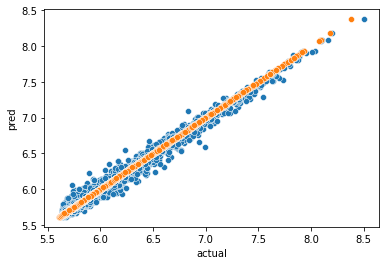

In [33]:
df_check = X_train.copy()
df_check["actual"] = y
df_check["pred"] = gridcv.predict(X_train)
sns.scatterplot(data = df_check, x = "actual", y="pred",)
sns.scatterplot(data = df_check, x = "pred", y="pred",)

the scatter is a little closer than our previous graph

save the model

In [34]:
import joblib
joblib.dump(gridcv.best_estimator_, 'model.pkl')

['model.pkl']

# Model Inference

In [35]:
X_train[166:169]
categorical_data = X_train.select_dtypes(["object"]).columns.to_list()
numerical_data = [i for i in X_train if i not in categorical_data]
print(list(X_train.columns))
print(len(X_train.columns))
# for i in categorical_data:
#     print(f"{i}: {train_df[i].unique()}")
# for i in numerical_data:
#     print(f"Max: {train_df[i].max()}, Min: {train_df[i].min()}")

['min_players', 'max_players', 'avg_time', 'year', 'num_votes', 'mechanic', 'owned', 'category1', 'category2', 'category3', 'category4', 'category5', 'category6', 'category7', 'category8', 'category9', 'category10', 'category11', 'category12']
19


In [36]:
arr = []
# for i, col in enumerate(X_train2.columns):
#     arr = np.concatenate((arr, [X_train2.iloc[i, i]]), axis=0)
# arr.shape
# new_data = pd.DataFrame([arr], columns=X_train2.columns)
# for col in new_data[numerical_data].columns:
#     new_data.loc[0, col] = np.int64(float(new_data.loc[0, col]))
#     new_data[col].astype(np.dtype(np.int64))
new_data = X_train[1:2]
for i, col in enumerate(X_train.columns):
    new_data.loc[0, col] = X_train.iloc[i, i]

print("Geek Rating of this new board game is %s" % gridcv.predict(new_data)[0])

Geek Rating of this new board game is 5.891444135920387


C:\Users\SHINSA~1\AppData\Local\Temp/ipykernel_22000/4222005298.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data.loc[0, col] = X_train.iloc[i, i]


# Conclusion

Model Analysis:
- CatBoost is the winner for this dataset
- Our Model scores is really good
- it looks like our model is a goodfit, not overfitting nor underfitting
- the model training time is fast because our data is not that big


Overall Analysis:
- The category data is a bit messy
- owned and num_votes is really correlated with geek_rating
- the range value of numerical feature column is really wide